In [5]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv('/Users/akshatsinha/ML/data.csv')

In [7]:
data.head()

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,18,F,XW0DQ7H,Village,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0,Enterprise,46,33,8793,1027.11,2
1,32,F,5K0N3X1,City,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0,Enterprise,37,30,8605,862.65,1
2,44,F,1F2TCL3,Town,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1,Basic,17,17,267,411.37,16
3,37,M,VJGJ33N,City,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1,Basic,8,8,227,215.77,20
4,31,F,SVZXCWB,City,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1,Basic,13,11,294,231.94,2


In [8]:
data.shape

(36992, 28)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   referral_id                   36992 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           36992 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_session_duration          36992 non-null  float64
 13  a

In [10]:
data.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_session_duration               0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn                              0
plan_tier                          0
logins_90d                         0
active_days_90d                    0
api_calls_90d                      0
session_minutes_90d                0
d

In [11]:
data['churn'].value_counts()/data.shape[0]

churn
1    0.540982
0    0.459018
Name: count, dtype: float64

In [12]:
data.dtypes

age                               int64
gender                           object
security_no                      object
region_category                  object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_session_duration            float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn                             int64
plan_tier                        object
logins_90d                        int64
active_days_90d                   int64


In [13]:
df=data.copy()

In [14]:
def unique_values(df):
    for c in df.columns:
        if df[c].dtypes=='object':
            print(f'{c} --> {df[c].unique()}')

In [15]:
unique_values(df)

gender --> ['F' 'M' 'Unknown']
security_no --> ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category --> ['Village' 'City' 'Town' nan]
joining_date --> ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
joined_through_referral --> ['No' '?' 'Yes']
referral_id --> ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types --> ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation --> ['?' 'Desktop' 'Smartphone' 'Both']
internet_option --> ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time --> ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
avg_frequency_login_days --> ['17' '10' '22' ... '-9.325511142' '-8.759329713' '27.83992744']
used_special_discount --> ['Yes' 'No']
offer_application_preference --> ['Yes' 'No']
past_complaint --> ['No' 'Yes']
complaint_status --> ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'N

In [16]:
empty_string_columns=['gender','joined_through_network','medium_of_operation']

In [17]:
df['gender']=df['gender'].replace('Unknown',df['gender'].mode()[0])
df['joined_through_referral']=df['joined_through_referral'].replace('?',df['joined_through_referral'].mode()[0])
df['medium_of_operation']=df['medium_of_operation'].replace('?',df['medium_of_operation'].mode()[0])

In [18]:
unique_values(df)

gender --> ['F' 'M']
security_no --> ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category --> ['Village' 'City' 'Town' nan]
joining_date --> ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
joined_through_referral --> ['No' 'Yes']
referral_id --> ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types --> ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation --> ['Desktop' 'Smartphone' 'Both']
internet_option --> ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time --> ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
avg_frequency_login_days --> ['17' '10' '22' ... '-9.325511142' '-8.759329713' '27.83992744']
used_special_discount --> ['Yes' 'No']
offer_application_preference --> ['Yes' 'No']
past_complaint --> ['No' 'Yes']
complaint_status --> ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Avai

In [19]:
yes_no_m_f_columns=['gender','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']

In [20]:
from sklearn.preprocessing import LabelEncoder
var={}
for c in yes_no_m_f_columns:
    le=LabelEncoder()
    df[c]=le.fit_transform(df[c])
    var[c]=le

In [21]:
df.head(3)

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,18,0,XW0DQ7H,Village,17-08-2017,0,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,16:08:02,17,300.63,53005.25,17,781.75,1,1,0,Not Applicable,Products always in Stock,0,Enterprise,46,33,8793,1027.11,2
1,32,0,5K0N3X1,City,28-08-2017,0,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10,NaN,1,0,1,Solved,Quality Customer Care,0,Enterprise,37,30,8605,862.65,1
2,44,0,1F2TCL3,Town,11-11-2016,1,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22,500.69,0,1,1,Solved in Follow-up,Poor Website,1,Basic,17,17,267,411.37,16


In [22]:
unique_values(df)

security_no --> ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category --> ['Village' 'City' 'Town' nan]
joining_date --> ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
referral_id --> ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types --> ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation --> ['Desktop' 'Smartphone' 'Both']
internet_option --> ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time --> ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
avg_frequency_login_days --> ['17' '10' '22' ... '-9.325511142' '-8.759329713' '27.83992744']
complaint_status --> ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback --> ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User

In [23]:
fill_na=['region_category','preferred_offer_types']
for c in fill_na:
    df[c]=df[c].fillna(df[c].mode()[0])

<Axes: xlabel='points_in_wallet', ylabel='Density'>

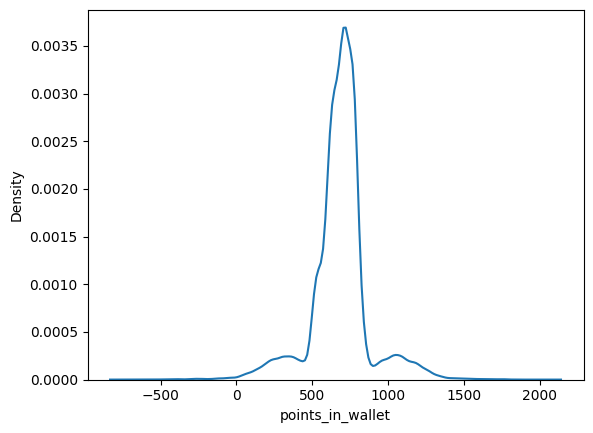

In [24]:
import seaborn as sns
sns.kdeplot(df['points_in_wallet'])

In [25]:
df['points_in_wallet'].skew()

-0.0803091829746022

In [26]:
df['points_in_wallet']=df['points_in_wallet'].fillna(df['points_in_wallet'].mean())

In [27]:
df['avg_frequency_login_days']=pd.to_numeric(df['avg_frequency_login_days'],errors='coerce')

<Axes: xlabel='avg_frequency_login_days', ylabel='Density'>

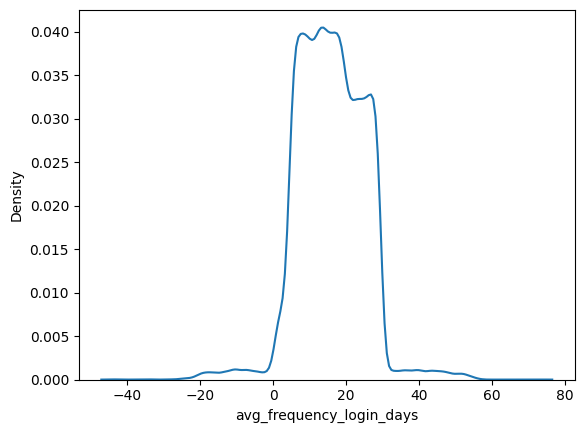

In [28]:
sns.kdeplot(df['avg_frequency_login_days'])

In [29]:
df['avg_frequency_login_days'].skew()

0.005767066591342272

In [30]:
df['avg_frequency_login_days']=df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].mean())

In [31]:
to_onehot_encode=['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','plan_tier','feedback']

In [32]:
df1_ohe=pd.get_dummies(data=df,columns=['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','plan_tier','feedback'])
df1_ohe.columns

Index(['age', 'gender', 'security_no', 'joining_date',
       'joined_through_referral', 'referral_id', 'last_visit_time',
       'days_since_last_login', 'avg_session_duration',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'churn', 'logins_90d', 'active_days_90d',
       'api_calls_90d', 'session_minutes_90d', 'days_since_active',
       'region_category_City', 'region_category_Town',
       'region_category_Village',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Fiber_Optic', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'compla

In [33]:
df1_ohe.sample(4)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active,region_category_City,region_category_Town,region_category_Village,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,plan_tier_Basic,plan_tier_Enterprise,plan_tier_Pro,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
12945,52,0,CYE1W6H,03-01-2016,0,xxxxxxxx,3:17:19,15,284.25,34974.91,6.0,710.00,1,0,1,0,43,31,9207,1041.22,0,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False
14078,32,0,1EY4KXH,17-04-2017,1,CID57334,12:11:41,13,139.90,25119.69,26.0,682.45,0,1,0,1,19,16,327,445.94,1,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
34634,58,1,IIJC8TX,21-01-2015,0,xxxxxxxx,15:30:50,15,31.77,16216.30,29.0,731.52,0,1,1,0,43,35,8985,922.90,4,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False
13458,61,0,1AX4K7H,26-06-2015,1,xxxxxxxx,1:48:29,10,578.43,28499.72,7.0,620.99,1,0,0,1,15,13,295,327.02,0,False,True,False,False,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


In [34]:
for c in df1_ohe.columns:
    df1_ohe[c]=df1_ohe[c].replace({True:1,False:0})

/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_22313/3315045924.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_ohe[c]=df1_ohe[c].replace({True:1,False:0})


In [35]:
df1_ohe.sample(3)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active,region_category_City,region_category_Town,region_category_Village,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,plan_tier_Basic,plan_tier_Enterprise,plan_tier_Pro,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
28651,44,0,TZKNAXC,27-08-2017,1,CID60708,4:10:31,21,149.43,7745.96,18.0,749.880000,0,1,1,0,45,35,9370,1139.20,6,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2804,26,0,1SSSHH9,24-06-2015,1,CID22424,10:11:15,14,109.98,14417.22,14.0,951.843126,1,0,1,1,15,14,275,433.89,2,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
6298,55,0,JM4OMF8,30-12-2015,1,CID26830,14:24:02,24,38.01,32490.92,13.0,1025.699739,0,1,0,0,49,37,8936,1184.96,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [36]:
df2=df1_ohe.select_dtypes(include=['int64','float64'])
abs(df2.corr()['churn']).sort_values(ascending=False)

churn                                             1.000000
plan_tier_Basic                                   0.726132
api_calls_90d                                     0.659219
active_days_90d                                   0.647458
logins_90d                                        0.643144
plan_tier_Enterprise                              0.606217
session_minutes_90d                               0.524295
points_in_wallet                                  0.292793
days_since_active                                 0.273094
avg_transaction_value                             0.218012
feedback_Reasonable Price                         0.216665
feedback_User Friendly Website                    0.214590
feedback_Products always in Stock                 0.213867
feedback_Quality Customer Care                    0.212093
plan_tier_Pro                                     0.210168
avg_frequency_login_days                          0.125611
feedback_Poor Product Quality                     0.0995

In [37]:
df3_le=df.copy()
var2={}
for c in to_onehot_encode:
    le=LabelEncoder()
    df3_le[c]=le.fit_transform(df[c])
    var2[c]=le

In [38]:
df3_1=df3_le.select_dtypes(include=['int64','float64'])
abs(df3_1.corr()['churn']).sort_values(ascending=False)

churn                           1.000000
api_calls_90d                   0.659219
active_days_90d                 0.647458
logins_90d                      0.643144
plan_tier                       0.526254
session_minutes_90d             0.524295
points_in_wallet                0.292793
days_since_active               0.273094
avg_transaction_value           0.218012
feedback                        0.207723
avg_frequency_login_days        0.125611
joined_through_referral         0.028695
preferred_offer_types           0.025032
medium_of_operation             0.020011
offer_application_preference    0.018729
region_category                 0.017875
avg_session_duration            0.014263
used_special_discount           0.010648
past_complaint                  0.008934
internet_option                 0.007493
days_since_last_login           0.006228
age                             0.006124
gender                          0.004701
complaint_status                0.000114
Name: churn, dty

In [39]:
df3_le.sample(4)

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
23300,27,1,05LVTDS,1,24-08-2015,1,CID54191,2,1,0,23:19:37,16,1258.480985,19486.70,5.0,282.17145,0,1,0,1,4,0,1,34,22,8645,518.72,0
16103,61,0,Z60F3AJ,0,18-07-2015,1,CID28060,2,1,0,12:27:19,18,241.280000,21796.01,28.0,662.20000,1,1,1,0,3,1,2,22,21,1910,567.98,1
9903,43,0,BZ1K1MS,0,26-04-2015,1,CID17032,2,1,2,21:25:51,11,634.760000,17273.97,5.0,569.39000,0,1,1,2,0,1,0,16,16,370,320.21,0
28146,49,1,4HUYMLF,2,25-07-2017,0,xxxxxxxx,2,0,1,13:50:55,19,354.860000,15925.90,6.0,651.42000,1,0,0,1,2,1,0,14,12,322,258.36,24


In [40]:
df.select_dtypes(include=['int64','float64']).describe()

,age,gender,joined_through_referral,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,0.498567,0.424822,-41.915576,243.472334,29271.194003,15.976715,686.882199,0.549903,0.552552,0.497135,0.540982,24.013057,20.428795,3223.677849,524.694113,4.312203
std,15.867412,0.500005,0.494323,228.819900,398.289149,19444.806226,8.766154,184.811682,0.497510,0.497237,0.499999,0.498324,12.778238,9.473876,4060.336858,345.090190,5.781831
min,10.000000,0.000000,0.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,171.000000,5.400000,0.000000
25%,23.000000,0.000000,0.000000,8.000000,60.102500,14177.540000,10.000000,624.350000,0.000000,0.000000,0.000000,0.000000,14.000000,13.000000,346.000000,266.135000,1.000000
50%,37.000000,0.000000,0.000000,12.000000,161.765000,27554.485000,15.976715,686.882199,1.000000,1.000000,0.000000,1.000000,21.000000,19.000000,1626.000000,432.570000,2.000000
75%,51.000000,1.000000,1.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000,1.000000,1.000000,1.000000,32.000000,27.000000,2967.000000,707.270000,6.000000
max,64.000000,1.000000,1.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000,1.000000,1.000000,1.000000,75.000000,54.000000,18776.000000,2192.280000,78.000000


In [41]:
to_scale=['age','days_since_last_login','avg_session_duration','avg_transaction_value','avg_frequency_login_days','points_in_wallet','logins_90d','active_days_90d','api_calls_90d','session_minutes_90d','days_since_active']

In [42]:
df[to_scale].dtypes

age                           int64
days_since_last_login         int64
avg_session_duration        float64
avg_transaction_value       float64
avg_frequency_login_days    float64
points_in_wallet            float64
logins_90d                    int64
active_days_90d               int64
api_calls_90d                 int64
session_minutes_90d         float64
days_since_active             int64
dtype: object

In [43]:
from sklearn.preprocessing import StandardScaler
def std_scaler(df,to_scale):
    std=StandardScaler()
    df[to_scale]=std.fit_transform(df[to_scale])

In [44]:
std_scaler(df,to_scale)

In [45]:
from sklearn.preprocessing import MinMaxScaler
def norm_scaler(df,to_scale):
    min_max_scaler=MinMaxScaler()
    df[to_scale]=min_max_scaler.fit_transform(df[to_scale])

In [46]:
norm_scaler(df1_ohe,to_scale)

In [47]:
df1_ohe.head(5)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active,region_category_City,region_category_Town,region_category_Village,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,plan_tier_Basic,plan_tier_Enterprise,plan_tier_Pro,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.148148,0,XW0DQ7H,17-08-2017,0,xxxxxxxx,16:08:02,0.991220,0.514859,0.526717,0.519666,0.545073,1,1,0,0,0.608108,0.603774,0.463424,0.467200,0.025641,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0.407407,0,5K0N3X1,28-08-2017,0,CID21329,12:38:13,0.990244,0.515803,0.121456,0.459691,0.511548,1,0,1,0,0.486486,0.547170,0.453319,0.391997,0.012821,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0.629630,0,1F2TCL3,11-11-2016,1,CID12313,22:53:21,0.988293,0.550486,0.204074,0.562506,0.445750,0,1,1,1,0.216216,0.301887,0.005160,0.185639,0.205128,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.500000,1,VJGJ33N,29-10-2016,1,CID3793,15:57:50,0.985366,0.473971,0.246577,0.425419,0.469416,0,1,1,1,0.094595,0.132075,0.003010,0.096196,0.256410,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
4,0.388889,0,SVZXCWB,12-09-2017,0,xxxxxxxx,15:46:44,0.994146,0.483866,0.238950,0.511098,0.503130,0,1,1,1,0.162162,0.188679,0.006611,0.103591,0.025641,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [48]:
df1_ohe.dtypes

age                                               float64
gender                                              int64
security_no                                        object
joining_date                                       object
joined_through_referral                             int64
referral_id                                        object
last_visit_time                                    object
days_since_last_login                             float64
avg_session_duration                              float64
avg_transaction_value                             float64
avg_frequency_login_days                          float64
points_in_wallet                                  float64
used_special_discount                               int64
offer_application_preference                        int64
past_complaint                                      int64
churn                                               int64
logins_90d                                        float64
active_days_90

In [49]:
norm_scaler(df3_le,to_scale)

In [50]:
df3_le.head()

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,0.148148,0,XW0DQ7H,2,17-08-2017,0,xxxxxxxx,1,1,2,16:08:02,0.991220,0.514859,0.526717,0.519666,0.545073,1,1,0,1,4,0,1,0.608108,0.603774,0.463424,0.467200,0.025641
1,0.407407,0,5K0N3X1,0,28-08-2017,0,CID21329,1,1,1,12:38:13,0.990244,0.515803,0.121456,0.459691,0.511548,1,0,1,2,5,0,1,0.486486,0.547170,0.453319,0.391997,0.012821
2,0.629630,0,1F2TCL3,1,11-11-2016,1,CID12313,1,1,2,22:53:21,0.988293,0.550486,0.204074,0.562506,0.445750,0,1,1,3,3,1,0,0.216216,0.301887,0.005160,0.185639,0.205128
3,0.500000,1,VJGJ33N,0,29-10-2016,1,CID3793,1,1,1,15:57:50,0.985366,0.473971,0.246577,0.425419,0.469416,0,1,1,4,3,1,0,0.094595,0.132075,0.003010,0.096196,0.256410
4,0.388889,0,SVZXCWB,0,12-09-2017,0,xxxxxxxx,0,2,1,15:46:44,0.994146,0.483866,0.238950,0.511098,0.503130,0,1,1,2,3,1,0,0.162162,0.188679,0.006611,0.103591,0.025641


In [51]:
df3_le.dtypes

age                             float64
gender                            int64
security_no                      object
region_category                   int64
joining_date                     object
joined_through_referral           int64
referral_id                      object
preferred_offer_types             int64
medium_of_operation               int64
internet_option                   int64
last_visit_time                  object
days_since_last_login           float64
avg_session_duration            float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount             int64
offer_application_preference      int64
past_complaint                    int64
complaint_status                  int64
feedback                          int64
churn                             int64
plan_tier                         int64
logins_90d                      float64
active_days_90d                 float64


In [52]:
input_data1=df1_ohe.copy()
input_data2=df3_le.copy()

In [53]:
input_data1=input_data1.drop(columns=['security_no','joining_date','referral_id','last_visit_time'])
input_data2=input_data2.drop(columns=['security_no','joining_date','referral_id','last_visit_time'])

In [121]:
input_data2.columns

Index(['age', 'gender', 'region_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'days_since_last_login', 'avg_session_duration',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn', 'plan_tier',
       'logins_90d', 'active_days_90d', 'api_calls_90d', 'session_minutes_90d',
       'days_since_active'],
      dtype='object')

In [54]:
input_data1.shape,input_data2.shape

((36992, 46), (36992, 24))

In [57]:
x=input_data1.drop(columns=['churn'])
y=input_data1['churn']

x2=input_data2.drop(columns=['churn'])
y2=input_data2['churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [68]:
import tensorflow
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [70]:
early_stop=EarlyStopping(monitor='val_accuracy',patience=6,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',patience=3,factor=0.2)

In [72]:
ANN_Model=Sequential([
    Dense(30,input_dim=45,activation='relu'),
    Dense(1,activation='sigmoid')
])

ANN_Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
ANN_train=ANN_Model.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[early_stop,reduce_lr])

Epoch 1/100


/Users/akshatsinha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


740/740 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7749 - loss: 0.4469 - val_accuracy: 0.8414 - val_loss: 0.2640 - learning_rate: 0.0010
Epoch 2/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8446 - loss: 0.2685 - val_accuracy: 0.8540 - val_loss: 0.2537 - learning_rate: 0.0010
Epoch 3/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8528 - loss: 0.2594 - val_accuracy: 0.8537 - val_loss: 0.2517 - learning_rate: 0.0010
Epoch 4/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8510 - loss: 0.2619 - val_accuracy: 0.8572 - val_loss: 0.2512 - learning_rate: 0.0010
Epoch 5/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8551 - loss: 0.2545 - val_accuracy: 0.8647 - val_loss: 0.2500 - learning_rate: 0.0010
Epoch 6/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8586 - loss: 0.2559 - val_accuracy: 0.8640 - val_loss: 0.2498 - learning_rate: 0.0010
Epoch 7/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8576 - loss: 0.2582 - val_a

In [81]:
ANN_Model2=Sequential([
    Dense(30,input_dim=23,activation='tanh'),
    Dense(15,activation='tanh'),
    Dense(1,activation='sigmoid')
])

ANN_Model2.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
ANN_train2=ANN_Model2.fit(x_train2,y_train2,epochs=100,validation_split=0.3,callbacks=[early_stop,reduce_lr])

Epoch 1/100


/Users/akshatsinha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7765 - loss: 0.4789 - val_accuracy: 0.8530 - val_loss: 0.3027 - learning_rate: 0.0010
Epoch 2/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8438 - loss: 0.3058 - val_accuracy: 0.8441 - val_loss: 0.2884 - learning_rate: 0.0010
Epoch 3/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8451 - loss: 0.2913 - val_accuracy: 0.8551 - val_loss: 0.2882 - learning_rate: 0.0010
Epoch 4/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8458 - loss: 0.2880 - val_accuracy: 0.8546 - val_loss: 0.2732 - learning_rate: 0.0010
Epoch 5/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8493 - loss: 0.2809 - val_accuracy: 0.8564 - val_loss: 0.2738 - learning_rate: 0.0010
Epoch 6/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8514 - loss: 0.2830 - val_accuracy: 0.8584 - val_loss: 0.2777 - learning_rate: 0.0010
Epoch 7/100
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8519 - loss: 0.2816 - val_a

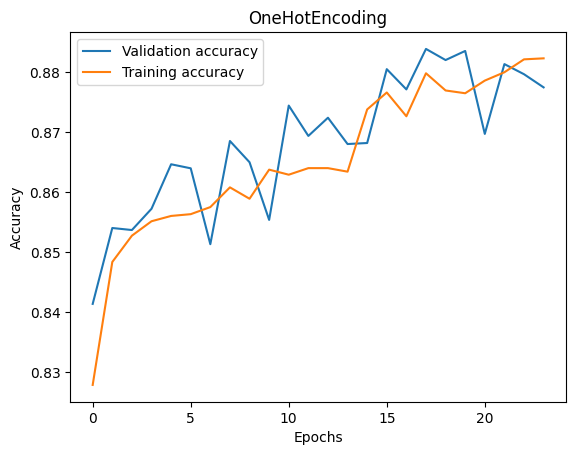

In [91]:
import matplotlib.pyplot as plt
plt.plot(ANN_train.history['val_accuracy'],label='Validation accuracy')
plt.plot(ANN_train.history['accuracy'],label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('OneHotEncoding')
plt.legend()

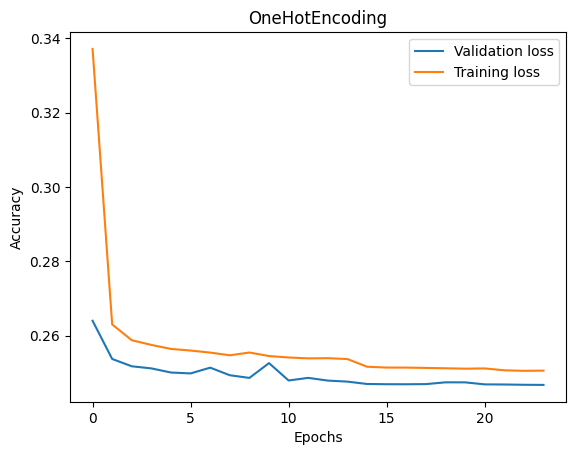

In [92]:
plt.plot(ANN_train.history['val_loss'],label='Validation loss')
plt.plot(ANN_train.history['loss'],label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('OneHotEncoding')
plt.legend()

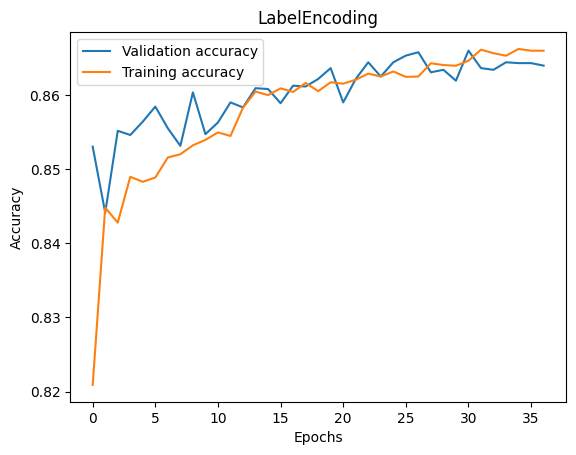

In [94]:
plt.plot(ANN_train2.history['val_accuracy'],label='Validation accuracy')
plt.plot(ANN_train2.history['accuracy'],label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LabelEncoding')
plt.legend()

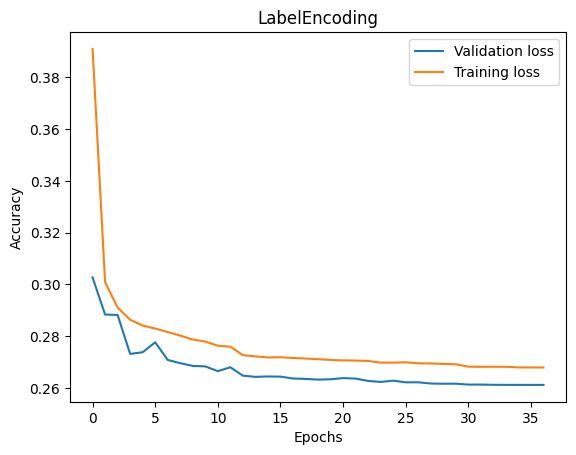

In [93]:
plt.plot(ANN_train2.history['val_loss'],label='Validation loss')
plt.plot(ANN_train2.history['loss'],label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LabelEncoding')
plt.legend()

In [99]:
y_pred=(ANN_Model.predict(x_test)>=0.5).astype(np.int64)
y_pred2=(ANN_Model2.predict(x_test2)>=0.5).astype(np.int64)

232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [105]:
from sklearn.metrics import accuracy_score
print("Accuracy on test ohe ",accuracy_score(y_test,y_pred))
print("Accuracy on test le ",accuracy_score(y_test2,y_pred2))

Accuracy on test ohe  0.8797134747938911
Accuracy on test le  0.8629544533045006


In [111]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report for the ANN OneHotEncoding")
print(classification_report(y_test,y_pred))

Classification Report for the ANN OneHotEncoding
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3377
           1       0.90      0.88      0.89      4022

    accuracy                           0.88      7399
   macro avg       0.88      0.88      0.88      7399
weighted avg       0.88      0.88      0.88      7399



In [112]:
print("Classification Report for the ANN LabelEncoding")
print(classification_report(y_test2,y_pred2))

Classification Report for the ANN LabelEncoding
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3377
           1       0.90      0.85      0.87      4022

    accuracy                           0.86      7399
   macro avg       0.86      0.86      0.86      7399
weighted avg       0.86      0.86      0.86      7399



Text(95.72222222222221, 0.5, 'Truth')

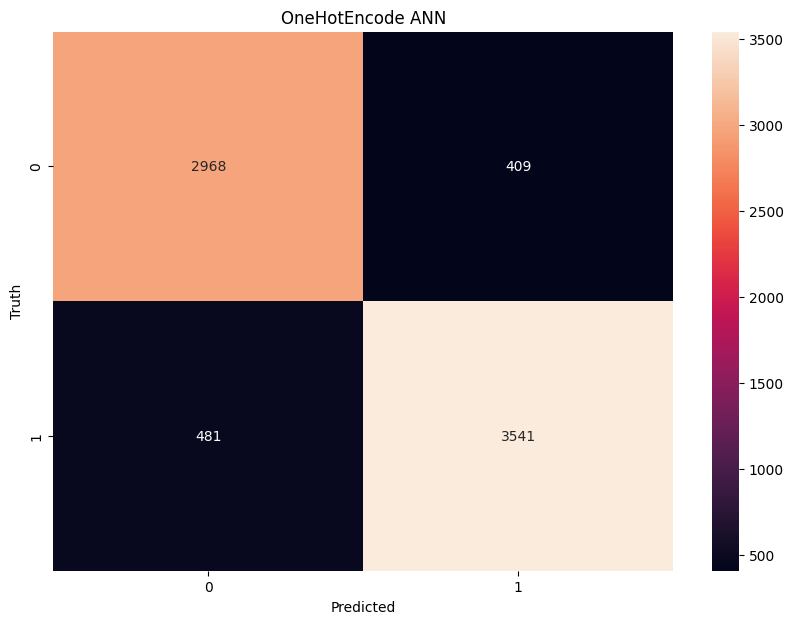

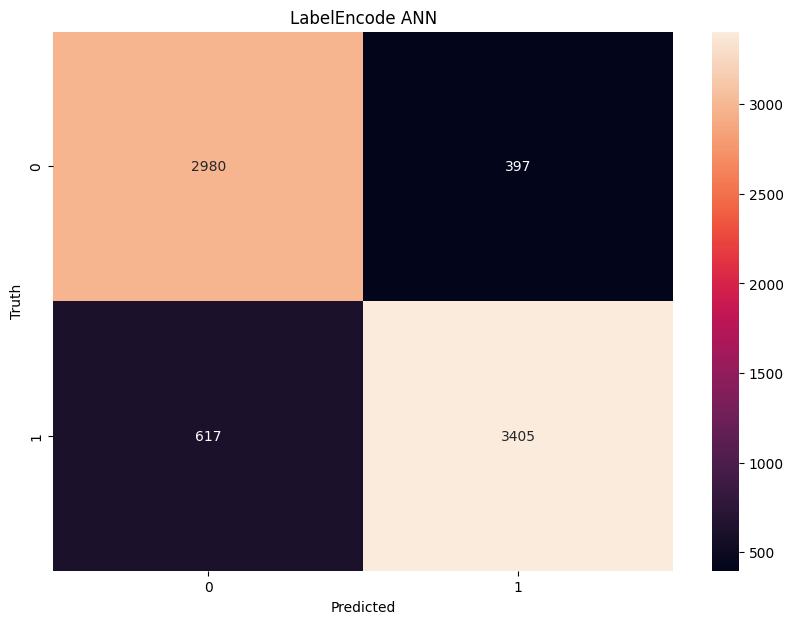

In [115]:
cm=tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title("OneHotEncode ANN")
plt.xlabel('Predicted')
plt.ylabel('Truth')

cm2=tensorflow.math.confusion_matrix(labels=y_test2,predictions=y_pred2)

plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True,fmt='d')
plt.title("LabelEncode ANN")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Working with other algorithms too

In [152]:
import xgboost
import catboost
import lightgbm as lgb

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_xgb=cross_val_score(xgb,x_train2,y_train2,cv=5)
scores_xgb.mean()

0.9320448449014952

In [139]:
y_pred_xgb=xgb.predict(x_test2)

In [140]:
accuracy_score(y_test,y_pred_xgb)

0.9306663062576024

In [147]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(x_train,y_train)

Learning rate set to 0.043765
0:	learn: 0.6163874	total: 3.51ms	remaining: 3.5s
1:	learn: 0.5527884	total: 6.53ms	remaining: 3.26s
2:	learn: 0.4979712	total: 9.98ms	remaining: 3.32s
3:	learn: 0.4471496	total: 13.5ms	remaining: 3.36s
4:	learn: 0.4195193	total: 16.1ms	remaining: 3.21s
5:	learn: 0.3900152	total: 19.1ms	remaining: 3.16s
6:	learn: 0.3631515	total: 21.8ms	remaining: 3.1s
7:	learn: 0.3382224	total: 24.6ms	remaining: 3.05s
8:	learn: 0.3211072	total: 28.2ms	remaining: 3.1s
9:	learn: 0.3027848	total: 30.8ms	remaining: 3.05s
10:	learn: 0.2857209	total: 33.7ms	remaining: 3.03s
11:	learn: 0.2729800	total: 36.2ms	remaining: 2.98s
12:	learn: 0.2605029	total: 38.8ms	remaining: 2.95s
13:	learn: 0.2524482	total: 41.8ms	remaining: 2.94s
14:	learn: 0.2415169	total: 44.2ms	remaining: 2.9s
15:	learn: 0.2336892	total: 46.7ms	remaining: 2.87s
16:	learn: 0.2260079	total: 49.4ms	remaining: 2.85s
17:	learn: 0.2180341	total: 52.3ms	remaining: 2.85s
18:	learn: 0.2124987	total: 55ms	remaining: 2.84

In [148]:
scores_cat=cross_val_score(cat,x_train,y_train,cv=5)
scores_cat.mean()

Learning rate set to 0.039788
0:	learn: 0.6236995	total: 2.51ms	remaining: 2.51s
1:	learn: 0.5656303	total: 4.97ms	remaining: 2.48s
2:	learn: 0.5137444	total: 7.5ms	remaining: 2.49s
3:	learn: 0.4654206	total: 9.88ms	remaining: 2.46s
4:	learn: 0.4385832	total: 12.6ms	remaining: 2.5s
5:	learn: 0.4179392	total: 16ms	remaining: 2.65s
6:	learn: 0.3879097	total: 18.5ms	remaining: 2.63s
7:	learn: 0.3636525	total: 20.4ms	remaining: 2.53s
8:	learn: 0.3421754	total: 22.8ms	remaining: 2.51s
9:	learn: 0.3239233	total: 25.3ms	remaining: 2.5s
10:	learn: 0.3079087	total: 27.6ms	remaining: 2.48s
11:	learn: 0.2905812	total: 30.7ms	remaining: 2.53s
12:	learn: 0.2757281	total: 33.1ms	remaining: 2.51s
13:	learn: 0.2675217	total: 35.7ms	remaining: 2.52s
14:	learn: 0.2578316	total: 38.3ms	remaining: 2.52s
15:	learn: 0.2483672	total: 41.1ms	remaining: 2.53s
16:	learn: 0.2408593	total: 43.8ms	remaining: 2.53s
17:	learn: 0.2353375	total: 46.8ms	remaining: 2.55s
18:	learn: 0.2286340	total: 49.7ms	remaining: 2.5

0.9344779109621207

In [149]:
y_pred_cat=cat.predict(x_test)
accuracy_score(y_test,y_pred_cat)

0.9336396810379781

In [160]:
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=100
)

lgbm_clf.fit(
    x_train,y_train,
    eval_set=[(x_test,y_test)],
    eval_metric='accuracy',
)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 15990, number of negative: 13603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1858
[LightGBM] [Info] Number of data points in the train set: 29593, number of used features: 45
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540330 -> initscore=0.161673
[LightGBM] [Info] Start training from score 0.161673


LGBMClassifier(learning_rate=0.05, objective='binary')

In [161]:
print("Best iteration:", lgbm_clf.best_iteration_)
y_pred_lgb=lgbm_clf.predict(x_test)

Best iteration: 0


In [163]:
accuracy_score(y_test,y_pred_lgb)

0.934720908230842

In [165]:
from sklearn.model_selection import GridSearchCV
params_grid_xgb={
    'n_estimators':[100,200,500],
    'max_depth':[3,5,7],
    'subsample':[0.8,1],
    'colsample_bytree':[0.8,1]
}
grid_xgb=GridSearchCV(xgb,params_grid_xgb,scoring='accuracy',n_jobs=-1)
grid_xgb.fit(x_train2,y_train2)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1]},
             scoring='accuracy')

In [166]:
print("Best params:",grid_xgb.best_params_)
print("Best score:",grid_xgb.best_score_)

Best params: {'colsample_bytree': 0.8, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best score: 0.9328896735420118


In [167]:
xgb_best=grid_xgb.best_estimator_
y_pred_grid_xgb=xgb_best.predict(x_test2)
accuracy_score(y_test2,y_pred_grid_xgb)

0.9322881470468982